# Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate? 

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the Data

Download and add the .csv files to the same folder as your notebook.

In [5]:
df_tesla = pd.read_csv('TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('UE Benefits Search vs UE Rate 2004-19.csv')

# Data Exploration

### Tesla

**Challenge**: <br>
<ul>
<li>What are the shapes of the dataframes? </li>
<li>How many rows and columns? </li>
<li>What are the column names? </li>
<li>Complete the f-string to show the largest/smallest number in the search data column</li> 
<li>Try the <code>.describe()</code> function to see some useful descriptive statistics</li>
<li>What is the periodicity of the time series data (daily, weekly, monthly)? </li>
<li>What does a value of 100 in the Google Trend search popularity actually mean?</li>
</ul>

In [3]:
df_tesla.head()

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


In [6]:
# Shape - rows and columns
df_tesla.shape

(124, 3)

In [7]:
# Column names
df_tesla.columns

Index(['MONTH', 'TSLA_WEB_SEARCH', 'TSLA_USD_CLOSE'], dtype='object')

In [11]:
df_tesla.nlargest(1,'TSLA_WEB_SEARCH')

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
123,2020-09-01,31,407.339996


In [18]:
largest_tes = df_tesla.nlargest(1,'TSLA_WEB_SEARCH')['TSLA_WEB_SEARCH'].iloc[0]
smallest_tes = df_tesla.nsmallest(1,'TSLA_WEB_SEARCH')['TSLA_WEB_SEARCH'].iloc[0]

In [19]:
print(f'Largest value for Tesla in Web Search: {largest_tes}')
print(f'Smallest value for Tesla in Web Search: {smallest_tes}')

Largest value for Tesla in Web Search: 31
Smallest value for Tesla in Web Search: 2


### Unemployment Data

In [20]:
df_unemployment.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.7
1,2004-02,33,5.6
2,2004-03,25,5.8
3,2004-04,29,5.6
4,2004-05,23,5.6


In [21]:
df_unemployment.shape

(181, 3)

In [22]:
df_unemployment.columns

Index(['MONTH', 'UE_BENEFITS_WEB_SEARCH', 'UNRATE'], dtype='object')

In [23]:
df_unemployment.nlargest(1,'UE_BENEFITS_WEB_SEARCH')

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
61,2009-02,100,8.3


In [26]:
highest_unemp = df_unemployment.nlargest(1,'UE_BENEFITS_WEB_SEARCH')['UE_BENEFITS_WEB_SEARCH'].iloc[0]

In [27]:
print('Largest value for "Unemployemnt Benefits" '
      f'in Web Search: {highest_unemp}')

Largest value for "Unemployemnt Benefits" in Web Search: 100


### Bitcoin

In [28]:
df_btc_price.head()

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


In [32]:
df_btc_price.shape

(2204, 3)

In [29]:
df_btc_search.head()

,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4
3,2014-12,4
4,2015-01,5


In [33]:
df_btc_search.shape

(73, 2)

In [34]:
# Largest BTC news search
df_btc_search.nlargest(1,'BTC_NEWS_SEARCH')

,MONTH,BTC_NEWS_SEARCH
39,2017-12,100


In [35]:
largest_btc = df_btc_search.nlargest(1,'BTC_NEWS_SEARCH')['BTC_NEWS_SEARCH'].iloc[0]

In [36]:
print(f'largest BTC News Search: {largest_btc}')

largest BTC News Search: 100


# Data Cleaning

### Check for Missing Values

**Challenge**: Are there any missing values in any of the dataframes? If so, which row/rows have missing values? How many missing values are there?

In [61]:
df_tesla.isna().values.any()

False

In [62]:
df_unemployment.isna().values.any()

False

In [63]:
df_btc_search.isna().values.any()

False

In [69]:
# Only one missing values is BITCOIN PRICE
df_btc_price.isna().values.any()

True

In [71]:
# Two missing values
df_btc_price.isna().values.sum()

2

In [80]:
# Finding where
df_btc_price[df_btc_price['CLOSE'].isna()]

,DATE,CLOSE,VOLUME
2148,2020-08-04,NaN,NaN


In [7]:
print(f'Missing values for Tesla?: {df_tesla.isna().values.any()}')
print(f'Missing values for U/E?: {df_unemployment.isna().values.any()}')
print(f'Missing values for BTC Search?: {df_btc_search.isna().values.any()}')

Missing values for Tesla?: 
Missing values for U/E?: 
Missing values for BTC Search?: 


In [8]:
print(f'Missing values for BTC price?: {df_btc_price.isna().values.any()}')

Missing values for BTC price?: 


In [5]:
print(f'Number of missing values: {df_btc_price.isna().values.sum()}')

Number of missing values: 


**Challenge**: Remove any missing values that you found. 

In [83]:
# To remove we can just use dropna() 
df_btc_price = df_btc_price.dropna()

In [84]:
# to check worked originally we had 2204 rows
df_btc_price.dropna().shape

(2203, 3)

### Convert Strings to DateTime Objects

**Challenge**: Check the data type of the entries in the DataFrame MONTH or DATE columns. Convert any strings in to Datetime objects. Do this for all 4 DataFrames. Double check if your type conversion was successful.

## 1. TESLA

In [88]:
# Check TESLA
type(df_tesla['MONTH'].iloc[0])

str

In [90]:
df_tesla['MONTH'].iloc[0]

'2010-06-01'

In [89]:
# As its a string we need to convert using the pd.to_datetime()
pd.to_datetime(df_tesla['MONTH'].iloc[0])

Timestamp('2010-06-01 00:00:00')

In [93]:
# Now we need to do it to all values!
df_tesla['MONTH'] = pd.to_datetime(df_tesla['MONTH'])

In [94]:
# Check success
type(df_tesla['MONTH'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

## 2. UNEMPLOYMENT

In [95]:
df_unemployment.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.7
1,2004-02,33,5.6
2,2004-03,25,5.8
3,2004-04,29,5.6
4,2004-05,23,5.6


In [98]:
# Check UNEMPLOYMENT
type(df_unemployment['MONTH'].iloc[0])

str

In [99]:
# Now we need to do it to all values!
df_unemployment['MONTH'] = pd.to_datetime(df_unemployment['MONTH'])

In [100]:
# Check success
type(df_unemployment['MONTH'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

## 2. BITCOIN

### A) Pricing

In [108]:
df_btc_price.head()

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


In [109]:
# Check Type
type(df_btc_price['DATE'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [110]:
# Convert to Datetime
df_btc_price['DATE'] = pd.to_datetime(df_btc_price['DATE'])

In [111]:
# Check Type changed
type(df_btc_price['DATE'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

### B) Search

In [112]:
df_btc_search.head()

,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4
3,2014-12,4
4,2015-01,5


In [113]:
# Check Type
type(df_btc_search['MONTH'].iloc[0])

str

In [114]:
# Convert to Datetime
df_btc_search['MONTH'] = pd.to_datetime(df_btc_search['MONTH'])

In [119]:
# Check Type changed
df_btc_search['MONTH']

0    2014-09-01
1    2014-10-01
2    2014-11-01
3    2014-12-01
4    2015-01-01
        ...    
68   2020-05-01
69   2020-06-01
70   2020-07-01
71   2020-08-01
72   2020-09-01
Name: MONTH, Length: 73, dtype: datetime64[ns]

### Converting from Daily to Monthly Data

[Pandas .resample() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) <br>

In [128]:
df_btc_price.head()

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


In [132]:
# We need to try resampling first and see what it looks like
# We take the last available price 
df_btc_price.resample('M', on='DATE').last()

,DATE,CLOSE,VOLUME
DATE,,,
2014-09-30,2014-09-30,386.944000,3.470730e+07
2014-10-31,2014-10-31,338.321014,1.254540e+07
2014-11-30,2014-11-30,378.046997,9.194440e+06
2014-12-31,2014-12-31,320.192993,1.394290e+07
2015-01-31,2015-01-31,217.464005,2.334820e+07
...,...,...,...
2020-05-31,2020-05-31,9461.058594,2.777329e+10
2020-06-30,2020-06-30,9137.993164,1.573580e+10
2020-07-31,2020-07-31,11323.466797,2.316047e+10


In [135]:
df_btc_price_monthly = df_btc_price.resample('M', on='DATE').last()

In [136]:
df_btc_price_monthly.shape

(73, 3)

In [140]:
df_btc_price_monthly.columns

Index(['DATE', 'CLOSE', 'VOLUME'], dtype='object')

# Data Visualisation

### Notebook Formatting & Style Helpers

In [22]:
# Create locators for ticks on the time axis

In [21]:
# Register date converters to avoid warning messages

### Tesla Stock Price v.s. Search Volume

**Challenge:** Plot the Tesla stock price against the Tesla search volume using a line chart and two different axes. Label one axis 'TSLA Stock Price' and the other 'Search Trend'. 

**Challenge**: Make the chart larger and easier to read. 
1. Increase the figure size (e.g., to 14 by 8). 
2. Increase the font sizes for the labels and the ticks on the x-axis to 14. 
3. Rotate the text on the x-axis by 45 degrees. 
4. Make the lines on the chart thicker. 
5. Add a title that reads 'Tesla Web Search vs Price'
6. Keep the chart looking sharp by changing the dots-per-inch or [DPI value](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.figure.html). 
7. Set minimum and maximum values for the y and x axis. Hint: check out methods like [set_xlim()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_xlim.html). 
8. Finally use [plt.show()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.show.html) to display the chart below the cell instead of relying on the automatic notebook output.

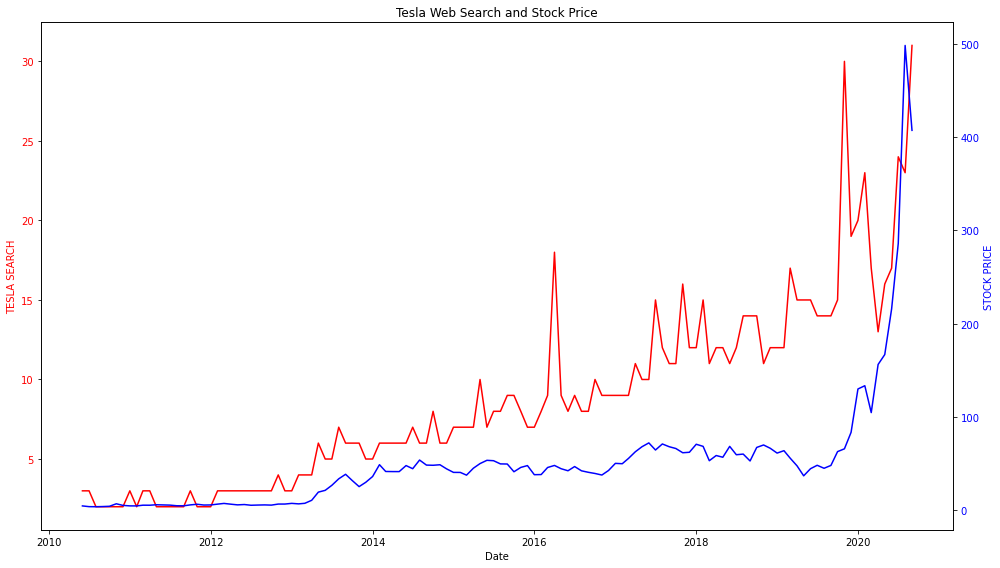

In [157]:
x_tesla = df_tesla['MONTH']
# SEARCH VALUES
y_tesla_search = df_tesla['TSLA_WEB_SEARCH']
# PRICE VALUES
y_tesla_price = df_tesla['TSLA_USD_CLOSE']

fig_tesla, ax1 = plt.subplots(figsize=(14, 8))
# Set the title
ax1.set_title('Tesla Web Search and Stock Price')
# X label
ax1.set_xlabel('Date')
# LHS for search
ax1.set_ylabel('TESLA SEARCH', color="red")
ax1.plot(x_tesla, y_tesla_search, color="red")
ax1.tick_params(axis='y', labelcolor="red")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
# RHS for stock price

ax2.set_ylabel('STOCK PRICE', color="blue")  # we already handled the x-label with ax1
ax2.plot(x_tesla, y_tesla_price, color="blue")
ax2.tick_params(axis='y', labelcolor="blue")

# # Set the minimum and maximum values on the axes
# ax1.set_ylim([0, 600])
# ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])

fig_tesla.tight_layout()  # otherwise the right y-label is slightly clipped

How to add tick formatting for dates on the x-axis. 

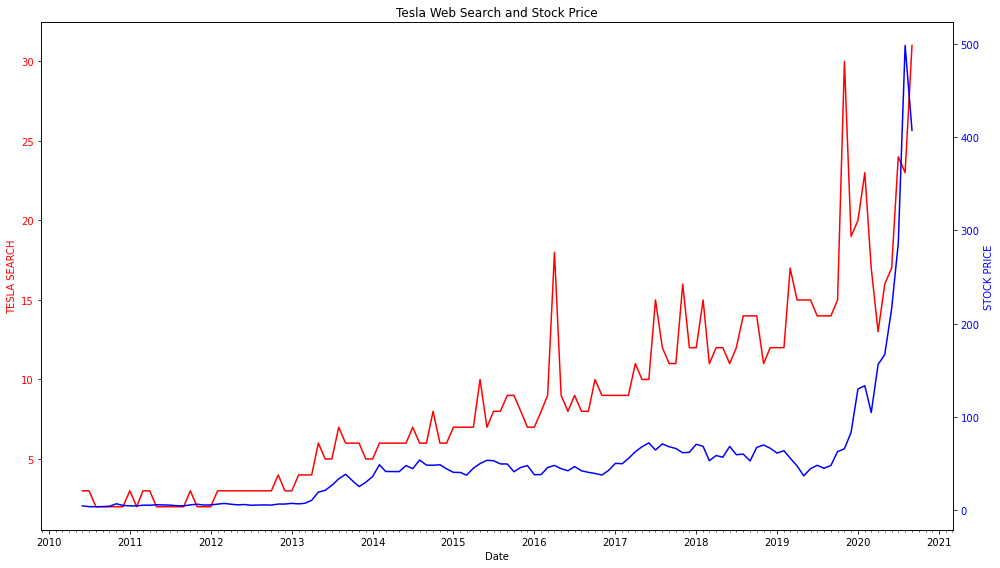

In [162]:
# ------------ >> ADDED
import matplotlib.dates as mdates
# Date formatter and locators
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

x_tesla = df_tesla['MONTH']
# SEARCH VALUES
y_tesla_search = df_tesla['TSLA_WEB_SEARCH']
# PRICE VALUES
y_tesla_price = df_tesla['TSLA_USD_CLOSE']

fig_tesla, ax1 = plt.subplots(figsize=(14, 8))
# Set the title
ax1.set_title('Tesla Web Search and Stock Price')
# X label
ax1.set_xlabel('Date')
# LHS for search
ax1.set_ylabel('TESLA SEARCH', color="red")
ax1.plot(x_tesla, y_tesla_search, color="red")
ax1.tick_params(axis='y', labelcolor="red")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
# RHS for stock price

ax2.set_ylabel('STOCK PRICE', color="blue")  # we already handled the x-label with ax1
ax2.plot(x_tesla, y_tesla_price, color="blue")
ax2.tick_params(axis='y', labelcolor="blue")

# # Set the minimum and maximum values on the axes
# ax1.set_ylim([0, 600])
# ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])

# format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

fig_tesla.tight_layout()  # otherwise the right y-label is slightly clipped

### Bitcoin (BTC) Price v.s. Search Volume

**Challenge**: Create the same chart for the Bitcoin Prices vs. Search volumes. <br>
1. Modify the chart title to read 'Bitcoin News Search vs Resampled Price' <br>
2. Change the y-axis label to 'BTC Price' <br>
3. Change the y- and x-axis limits to improve the appearance <br>
4. Investigate the [linestyles](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html ) to make the BTC price a dashed line <br>
5. Investigate the [marker types](https://matplotlib.org/3.2.1/api/markers_api.html) to make the search datapoints little circles <br>
6. Were big increases in searches for Bitcoin accompanied by big increases in the price?

In [164]:
df_btc_price_monthly.columns

Index(['DATE', 'CLOSE', 'VOLUME'], dtype='object')

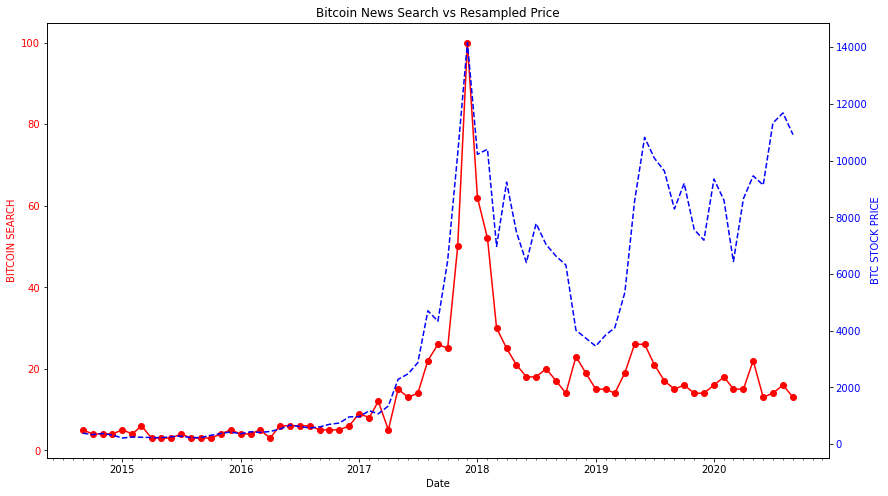

In [168]:
x_btc = df_btc_search['MONTH']
# SEARCH VALUES
y_btc_search = df_btc_search['BTC_NEWS_SEARCH']
# PRICE VALUES
y_btc_price = df_btc_price_monthly['CLOSE']

fig_btc, ax1 = plt.subplots(figsize=(14, 8))

# 1. Set the title
ax1.set_title('Bitcoin News Search vs Resampled Price')
# X label
ax1.set_xlabel('Date')
# LHS for search
ax1.set_ylabel('BITCOIN SEARCH', color="red")
# PLOT DATA
ax1.plot(x_btc, y_btc_search, color="red", marker='o')
ax1.tick_params(axis='y', labelcolor="red")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
# RHS for stock price

ax2.set_ylabel('BTC STOCK PRICE', color="blue")  # we already handled the x-label with ax1
# PLOT DATA
ax2.plot(x_btc, y_btc_price, color="blue", ls="--")
ax2.tick_params(axis='y', labelcolor="blue")

# # Set the minimum and maximum values on the axes
# ax1.set_ylim([0, 600])
# ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])

# format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

fig_tesla.tight_layout()  # otherwise the right y-label is slightly clipped

### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

**Challenge** Plot the search for "unemployment benefits" against the unemployment rate. 
1. Change the title to: Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate <br>
2. Change the y-axis label to: FRED U/E Rate <br>
3. Change the axis limits <br>
4. Add a grey [grid](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.grid.html) to the chart to better see the years and the U/E rate values. Use dashes for the line style<br> 
5. Can you discern any seasonality in the searches? Is there a pattern? 

In [169]:
df_unemployment.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01-01,34,5.7
1,2004-02-01,33,5.6
2,2004-03-01,25,5.8
3,2004-04-01,29,5.6
4,2004-05-01,23,5.6


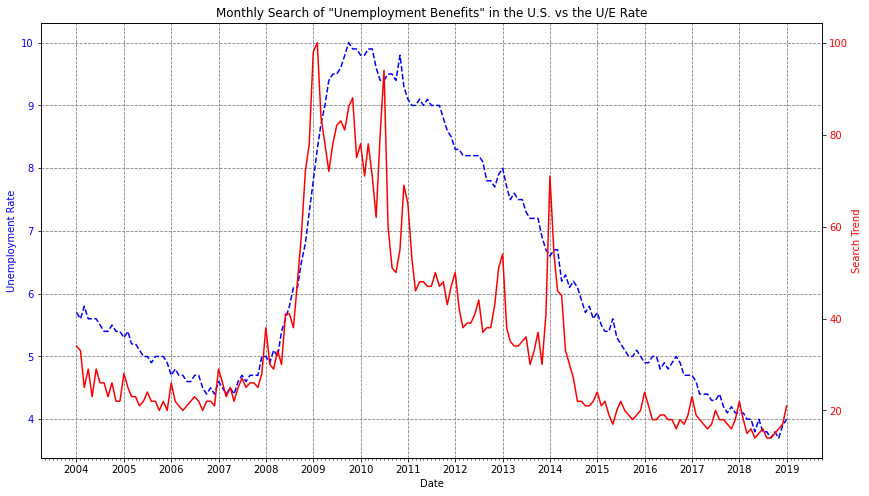

In [176]:
# Set x values as months
x_unemp = df_unemployment['MONTH']

# LHS UNEMPLOYMENT RATE VALUES
y_unemp_stock_price = df_unemployment['UNRATE']


# RHS SEARCH VALUES
y_unemp_search = df_unemployment['UE_BENEFITS_WEB_SEARCH']

# Create our Figure and axes
fig_btc, ax1 = plt.subplots(figsize=(14, 8))

# 1. Set the title
ax1.set_title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate')

# X axis label
ax1.set_xlabel('Date')

# RHS LABEL - UNEMPLOYMENT RATE VALUES
ax1.set_ylabel('Unemployment Rate', color="blue")  # we already handled the x-label with ax1
# >> PLOT DATA
ax1.plot(x_unemp, y_unemp_stock_price, color="blue", ls="--")
ax1.tick_params(axis='y', labelcolor="blue")

# ADD in GRID
ax1.grid(color='grey', linestyle='--')

# instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()  


# LHS LABEL - SEARCH VALUES
ax2.set_ylabel('Search Trend', color="red")
# >> PLOT DATA
ax2.plot(x_unemp, y_unemp_search, color="red")
ax2.tick_params(axis='y', labelcolor="red")

# # Set the minimum and maximum values on the axes
# ax1.set_ylim([0, 600])
# ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])

# format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

fig_tesla.tight_layout()  # otherwise the right y-label is slightly clipped

**Challenge**: Calculate the 3-month or 6-month rolling average for the web searches. Plot the 6-month rolling average search data against the actual unemployment. What do you see in the chart? Which line moves first?


In [180]:
df_rolled = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()

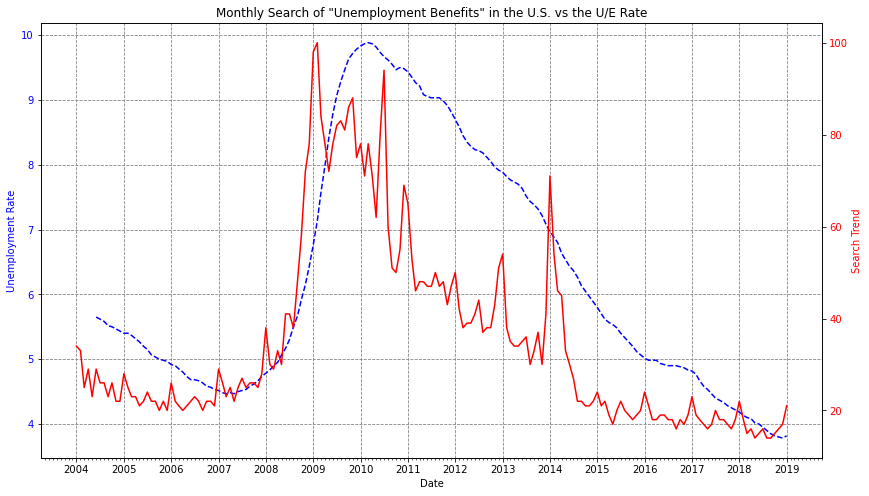

In [181]:
# Set x values as months
x_unemp = df_unemployment['MONTH']

# LHS UNEMPLOYMENT RATE VALUES
y_unemp_stock_price = df_rolled['UNRATE']


# RHS SEARCH VALUES
y_unemp_search = df_unemployment['UE_BENEFITS_WEB_SEARCH']

# Create our Figure and axes
fig_unemp, ax1 = plt.subplots(figsize=(14, 8))

# 1. Set the title
ax1.set_title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate')

# X axis label
ax1.set_xlabel('Date')

# RHS LABEL - UNEMPLOYMENT RATE VALUES
ax1.set_ylabel('Unemployment Rate', color="blue")  # we already handled the x-label with ax1
# >> PLOT DATA
ax1.plot(x_unemp, y_unemp_stock_price, color="blue", ls="--")
ax1.tick_params(axis='y', labelcolor="blue")

# ADD in GRID
ax1.grid(color='grey', linestyle='--')

# instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()  


# LHS LABEL - SEARCH VALUES
ax2.set_ylabel('Search Trend', color="red")
# >> PLOT DATA
ax2.plot(x_unemp, y_unemp_search, color="red")
ax2.tick_params(axis='y', labelcolor="red")

# # Set the minimum and maximum values on the axes
# ax1.set_ylim([0, 600])
# ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])

# format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

fig_unemp.tight_layout()

### Including 2020 in Unemployment Charts

**Challenge**: Read the data in the 'UE Benefits Search vs UE Rate 2004-20.csv' into a DataFrame. Convert the MONTH column to Pandas Datetime objects and then plot the chart. What do you see?

In [182]:
df_ue_2020 = pd.read_csv('UE Benefits Search vs UE Rate 2004-20.csv')

In [183]:
df_ue_2020.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,9,5.7
1,2004-02,8,5.6
2,2004-03,7,5.8
3,2004-04,8,5.6
4,2004-05,6,5.6


In [186]:
# Convert MONTH columns to Datetime object again
df_ue_2020['MONTH'] = pd.to_datetime(df_ue_2020['MONTH'])

In [190]:
# Roll again
df_rolled_2020 = df_ue_2020[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()

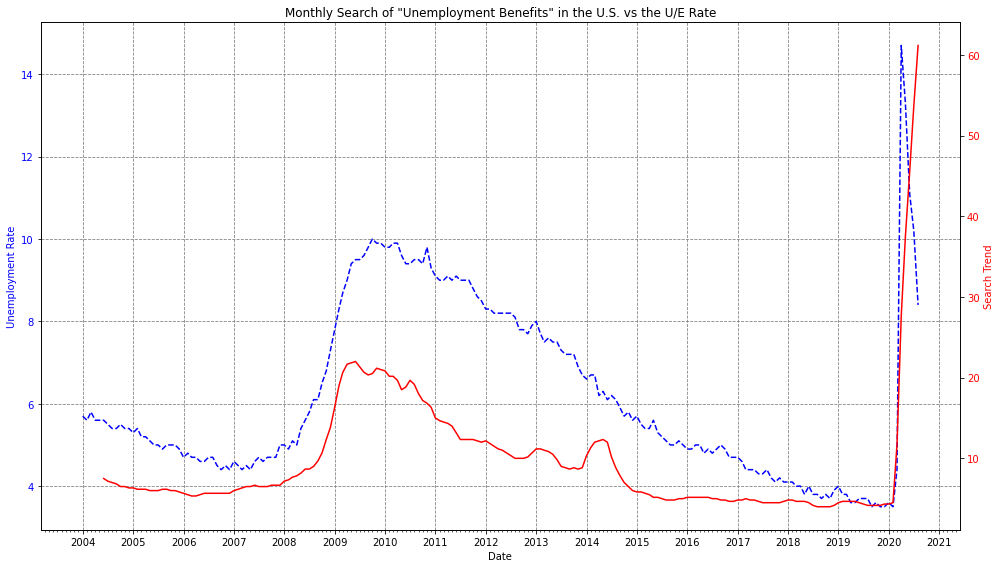

In [191]:
# Set x values as months
x_unemp = df_ue_2020['MONTH']

# LHS UNEMPLOYMENT RATE VALUES
y_unemp_stock_price = df_ue_2020['UNRATE']


# RHS SEARCH VALUES
y_unemp_search = df_rolled_2020['UE_BENEFITS_WEB_SEARCH']

# Create our Figure and axes
fig_unemp, ax1 = plt.subplots(figsize=(14, 8))

# 1. Set the title
ax1.set_title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate')

# X axis label
ax1.set_xlabel('Date')

# RHS LABEL - UNEMPLOYMENT RATE VALUES
ax1.set_ylabel('Unemployment Rate', color="blue")  # we already handled the x-label with ax1
# >> PLOT DATA
ax1.plot(x_unemp, y_unemp_stock_price, color="blue", ls="--")
ax1.tick_params(axis='y', labelcolor="blue")

# ADD in GRID
ax1.grid(color='grey', linestyle='--')

# instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()  


# LHS LABEL - SEARCH VALUES
ax2.set_ylabel('Search Trend', color="red")
# >> PLOT DATA
ax2.plot(x_unemp, y_unemp_search, color="red")
ax2.tick_params(axis='y', labelcolor="red")

# # Set the minimum and maximum values on the axes
# ax1.set_ylim([0, 600])
# ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])

# format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

fig_unemp.tight_layout()